In [1]:
#Imported required packages and libraries

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [2]:
#Fetch URL for data scrapping
url = 'https://www.cricketworldcup.com/standings'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

table = soup.find('table', class_ ='table')

In [3]:
#Fetched titles from Data table from website link
world_cup_standing = table.find_all('th')
world_cup_standing_titles = [title.text.strip() for title in world_cup_standing]

world_cup_standing_titles

['Pos',
 'Team',
 'Played',
 'PLD',
 'Won',
 'Lost',
 'N/R',
 'Tied',
 'Net RR',
 'NRR',
 'PointsPts']

In [4]:
#Removed unnecessary/unwanted titles to match and inline row data value

df = pd.DataFrame(columns = world_cup_standing_titles)

df = df.drop(columns = ['PLD','NRR'])

In [5]:
#Scrapped all values in row cells and prepared final table
row_data = table.find_all('tr')


for row in row_data[1:]:
    final_row_data = row.find_all('td')
    individual_row_data = [data.text.split('\\n')[0].strip() for data in final_row_data]
    length = len(df)
    df.loc[length] = individual_row_data

    
df.head()

,Pos,Team,Played,Won,Lost,N/R,Tied,Net RR,PointsPts
0,1,India\nIND,9,9,0,0,0,+2.570,18
1,2,South Africa\nSA,9,7,2,0,0,+1.261,14
2,3,Australia\nAUS,9,7,2,0,0,+0.841,14
3,4,New Zealand\nNZ,9,5,4,0,0,+0.743,10
4,5,Pakistan\nPAK,9,4,5,0,0,-0.199,8


In [6]:
#Attempted to clean 'Team' column to remove unwanted characters from object to make it clean

df['Team'] = df['Team'].apply(lambda x: x.split('\\')[0])

df.head()

,Pos,Team,Played,Won,Lost,N/R,Tied,Net RR,PointsPts
0,1,India\nIND,9,9,0,0,0,+2.570,18
1,2,South Africa\nSA,9,7,2,0,0,+1.261,14
2,3,Australia\nAUS,9,7,2,0,0,+0.841,14
3,4,New Zealand\nNZ,9,5,4,0,0,+0.743,10
4,5,Pakistan\nPAK,9,4,5,0,0,-0.199,8


In [ ]:
#Since it is not removing value after \n in Team column even before and after extracting value from Web,
# we will first convert it into CSV to manage it better and refine and organize it

In [7]:

df.to_csv(r'Downloads\world_cup_team_standing.csv', index = False)

df_cleaned= pd.read_csv("world_cup_team_standing.csv")

df_cleaned.shape

(40, 9)

In [8]:
#Cleaned and organized table data as required 

df_cleaned['Team'].str.split('\n',1, expand = True)

df_cleaned = df_cleaned.iloc[:10]


C:\Users\akash\AppData\Local\Temp\ipykernel_25680\3135130268.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_cleaned['Team'].str.split('\n',1, expand = True)


In [71]:
df_cleaned.head(11)

,Pos,Team,Played,Won,Lost,N/R,Tied,Net_RR,PointsPts
0,1,India,5,5,0,0,0,1.353,10
1,2,South Africa,5,4,1,0,0,2.370,8
2,3,New Zealand,5,4,1,0,0,1.481,8
3,4,Australia,4,2,2,0,0,-0.193,4
4,5,Pakistan,5,2,3,0,0,-0.400,4
5,6,Afghanistan,5,2,3,0,0,-0.969,4
6,7,Netherlands,4,1,3,0,0,-0.790,2
7,8,Sri Lanka,4,1,3,0,0,-1.048,2
8,9,England,4,1,3,0,0,-1.248,2
9,10,Bangladesh,5,1,4,0,0,-1.253,2


In [9]:
#Renamed column for error free and with proper name convention
df_cleaned = df_cleaned.rename(columns = {'Net RR': 'Net_RR'})

df_cleaned['Team']

0          India\nIND
1    South Africa\nSA
2     New Zealand\nNZ
3      Australia\nAUS
4       Pakistan\nPAK
5    Afghanistan\nAFG
6    Netherlands\nNED
7       Sri Lanka\nSL
8        England\nENG
9     Bangladesh\nBAN
Name: Team, dtype: object

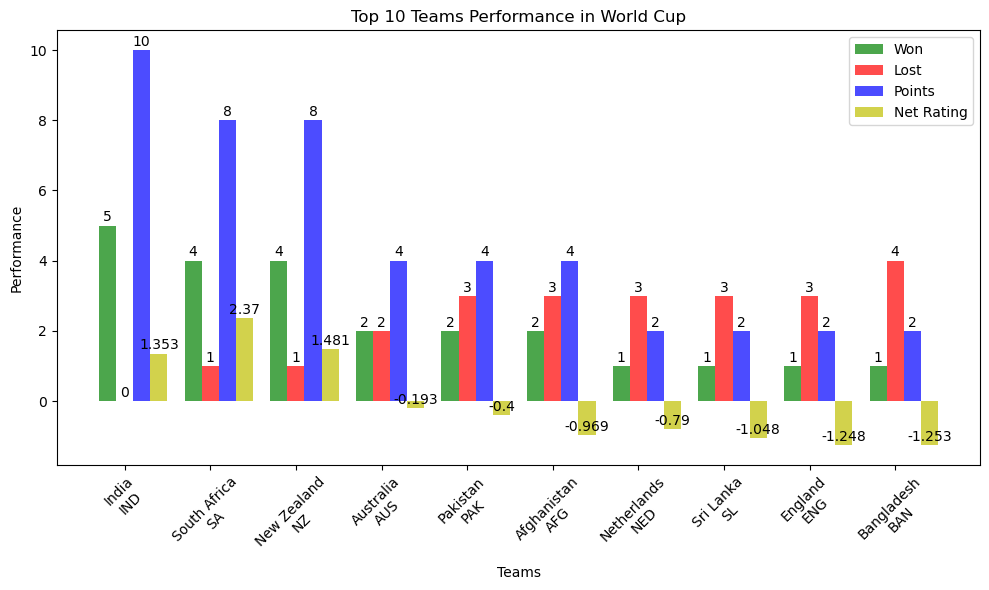

In [10]:
#Basic Visualization of Our data that we scrapped from Web

import matplotlib.pyplot as plt
# Creating a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 6))

# plotted the data on bars
bar_width = 0.2
index = range(len(df_cleaned['Team']))

bars1=plt.bar(index, df_cleaned['Won'], bar_width, label='Won', color='g', alpha=0.7)
bars2=plt.bar([i + bar_width for i in index], df_cleaned['Lost'], bar_width, label='Lost', color='r', alpha=0.7)
bars3=plt.bar([i + bar_width * 2 for i in index], df_cleaned['PointsPts'], bar_width, label='Points', color='b', alpha=0.7)
bars4=plt.bar([i + bar_width * 3 for i in index], df_cleaned['Net_RR'], bar_width, label='Net Rating', color='y', alpha=0.7)

# Added labels and title
plt.xlabel('Teams')
plt.ylabel('Performance')
plt.title('Top 10 Teams Performance in World Cup')

# now we have added ticks and labels for each team
plt.xticks([i + bar_width for i in index], df_cleaned['Team'], rotation=45)

# Added a legend to Graph
plt.legend(loc='upper right')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords='offset points', ha='center')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Displayed the plot
plt.tight_layout()
plt.show()